<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MultipleLR.csv - MultipleLR.csv.csv',header=None)

In [3]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [4]:
X.shape

(25, 3)

In [5]:
y.shape

(25,)

In [6]:
m = len(y)

# Task 1 

In [7]:
def compute_cost(X, y, theta, b1):
    #print(theta.shape, X.shape, b1)
    predictions = X.dot(theta) + b1
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1/(2 * m) * errors.T.dot(errors)
    return J

In [8]:

def gradient_descent_adam(X, y, theta, alpha, iterations,b1):
    cost_history = np.zeros(iterations)
    theta_history= []
    t = 0  
    v =  np.zeros(X.shape[1])
    s =  np.zeros(X.shape[1])
    
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    
    for i in range(iterations):
        predictions = X.dot(theta) +b1
        errors = np.subtract(predictions, y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        t = t + 1
        
        v = beta1*v + (1 - beta1)*sum_delta
        v_corrected = v/(1 - beta1**t)
        
        
        s = beta2*s + (1 - beta2)*np.square(sum_delta)
        s_corrected = s/(1 - beta2**t)
        
        theta = theta - alpha*v_corrected/(np.sqrt(s_corrected)+epsilon)
        
        #theta = theta - sum_delta;
        bias_gradient = np.sum(errors) / m
        b1 = b1 - alpha * bias_gradient;

            
            
        cost_history[i] = compute_cost(X, y, theta,b1)  
        theta_history.append(theta)
        #print("in function:", cost_history[i])
    return theta, cost_history,b1,theta_history

In [178]:
np.random.seed(42)
import random


In [324]:
theta =np.zeros(X.shape[1]) #np.random.random(3)*3.5 #np. random.randint(3, size=(X.shape[1]))
 #np.random.normal(3, 1, size=(X.shape[1])) #np.random.rand(X.shape[1]) # # #
iterations = 1000;
alpha = 0.15;
b1 = 0

In [325]:
theta

array([0., 0., 0.])

In [326]:
theta, cost_history,b1,theta_history = gradient_descent_adam(X, y, theta, alpha,iterations,b1)

In [327]:
len(theta_history[0])

3

In [328]:
theta_history_pd = pd.DataFrame(theta_history)

In [329]:
theta_history_pd

,0,1,2
0,0.150000,0.150000,0.150000
1,0.294572,0.294571,0.294574
2,0.427713,0.427709,0.427726
3,0.542241,0.542232,0.542285
4,0.632047,0.632028,0.632156
...,...,...,...
995,0.386760,0.527594,1.128972
996,0.386644,0.527634,1.129106
997,0.386529,0.527674,1.129238
998,0.386414,0.527714,1.129371


Text(0.5, 1.0, 'Convergence of gradient descent')

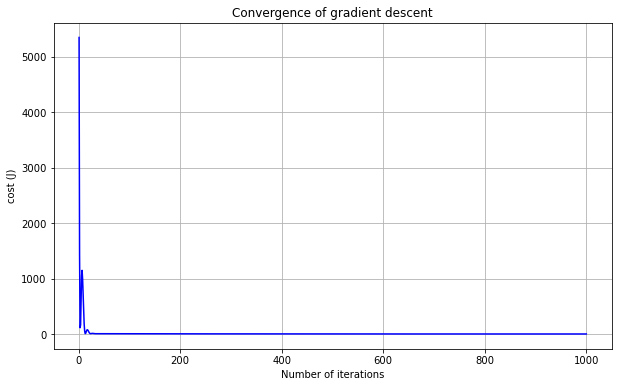

In [330]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

Text(0.5, 1.0, 'Convergence of gradient descent')

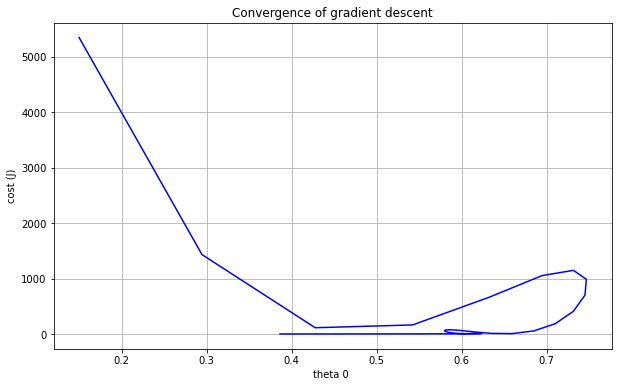

In [331]:
import matplotlib.pyplot as plt
plt.plot( theta_history_pd.iloc[:,0],cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("theta 0 ")
plt.title("Convergence of gradient descent")

Text(0.5, 1.0, 'Convergence of gradient descent')

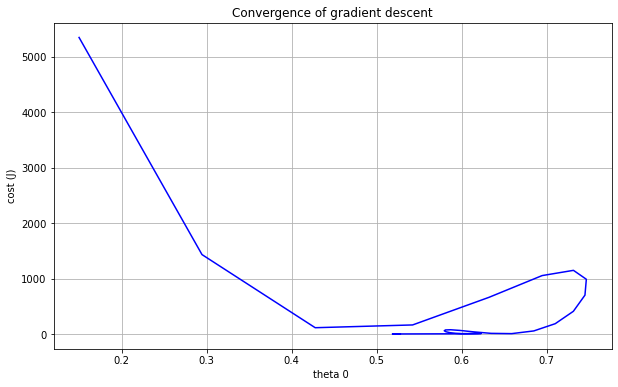

In [332]:
import matplotlib.pyplot as plt
plt.plot( theta_history_pd.iloc[:,1],cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("theta 0 ")
plt.title("Convergence of gradient descent")

Text(0.5, 1.0, 'Convergence of gradient descent')

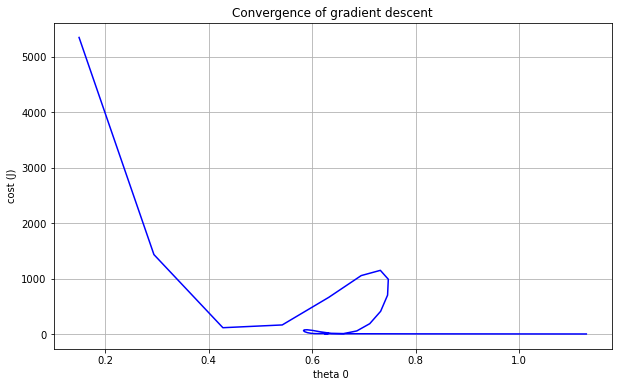

In [333]:
import matplotlib.pyplot as plt
plt.plot( theta_history_pd.iloc[:,2],cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("theta 0 ")
plt.title("Convergence of gradient descent")

In [334]:
from sklearn.metrics import r2_score
predictions = X.dot(theta) +b1
r2_score(y,predictions)

0.9895028971813314

In [335]:
min_index = cost_history.argmin()

In [336]:
min_index

999

In [337]:
cost_history[min_index]

2.9129376344982627

In [338]:
min_theta= theta_history_pd.iloc[min_index,:]

In [339]:
min_theta

0    0.386299
1    0.527754
2    1.129503
Name: 999, dtype: float64

In [340]:
from sklearn.metrics import r2_score
predictions = X.dot(min_theta) +b1
r2_score(y,predictions)

0.9895028971813314

# Task 2

In [116]:

import math
def random_mini_batches(X, Y, mini_batch_size = 64):

    
    m = X.shape[1]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [117]:

def gradient_descent_adam_mini(minibatches, theta, alpha, iterations,b1):
    cost_history = np.zeros(iterations)
    theta_history= []
    t = 0  
    v =  np.zeros(minibatches[0][0].shape[0])
    s =  np.zeros(minibatches[0][0].shape[0])
    
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    
    for i in range(iterations):
        for minibatch in minibatches:
            
            (X, y) = minibatch
            
            X= X.T
            y= y.reshape(-1)
            
            predictions = X.dot(theta) +b1
            errors = np.subtract(predictions, y) 
            sum_delta = (alpha / m) * X.transpose().dot(errors);
            t = t + 1

            v = beta1*v + (1 - beta1)*sum_delta
            v_corrected = v/(1 - beta1**t)


            s = beta2*s + (1 - beta2)*np.square(sum_delta)
            s_corrected = s/(1 - beta2**t)

            theta = theta - alpha*v_corrected/(np.sqrt(s_corrected)+epsilon)

            #theta = theta - sum_delta;
            bias_gradient = np.sum(errors) / len(y)
            b1 = b1 - alpha * bias_gradient;

            
            
        cost_history[i] = compute_cost(X, y, theta,b1)  
        theta_history.append(theta)
        #print("in function:", cost_history[i])
    return theta, cost_history,b1,theta_history

In [341]:
theta = np.zeros(X.shape[1]) #np.random.normal(3, 1, size=(X.shape[1]))
iterations = 1000;
alpha = 0.15;
b1 = 0
minibatches = random_mini_batches(X.values.T,  y.values.reshape(1,-1), 64)
theta, cost_history,b1,theta_history = gradient_descent_adam_mini(minibatches, theta, alpha,iterations,b1)

In [348]:
theta

array([0.38629872, 0.52775416, 1.12950256])

Text(0.5, 1.0, 'Convergence of gradient descent')

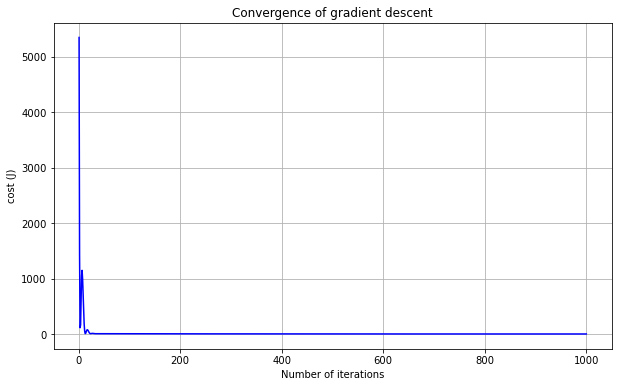

In [342]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

In [343]:
from sklearn.metrics import r2_score
predictions = X.dot(theta) +b1
r2_score(y,predictions)

0.9895028971813314

In [344]:
theta_history_pd = pd.DataFrame(theta_history)

Text(0.5, 1.0, 'Convergence of gradient descent')

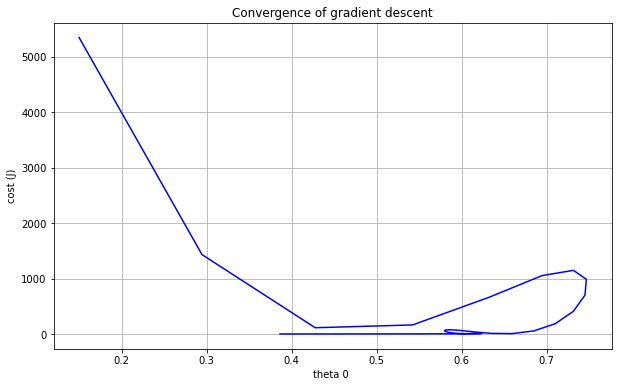

In [345]:
import matplotlib.pyplot as plt
plt.plot( theta_history_pd.iloc[:,0],cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("theta 0 ")
plt.title("Convergence of gradient descent")

Text(0.5, 1.0, 'Convergence of gradient descent')

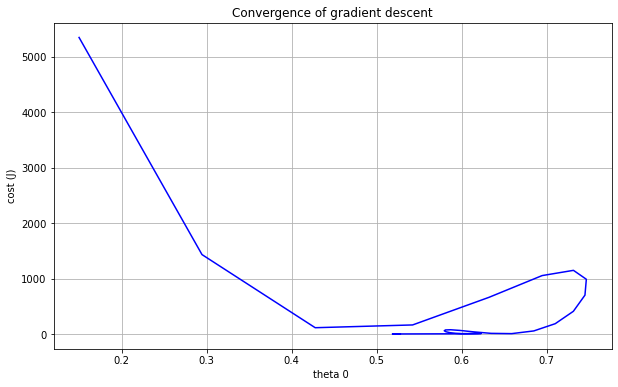

In [346]:
import matplotlib.pyplot as plt
plt.plot( theta_history_pd.iloc[:,1],cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("theta 0 ")
plt.title("Convergence of gradient descent")

Text(0.5, 1.0, 'Convergence of gradient descent')

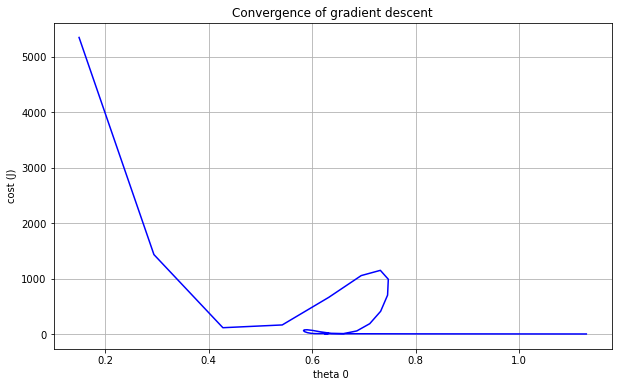

In [347]:
import matplotlib.pyplot as plt
plt.plot( theta_history_pd.iloc[:,2],cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("theta 0 ")
plt.title("Convergence of gradient descent")